
# Predicting the Ratings 
---

# Introduction

Using tools of your choice, complete the following tasks. Keep it simple. The goal of the exercise is not to do the deepest EDA, build the best model possible, or spend lots of time building a robust solution. The goal is to demonstrate your ability to complete the end-to-end process in a reasonable timeframe and explain your thought process clearly.

## Dataset

This dataset contains data of over 1,000 products, including their ratings and reviews.

### Features

The dataset includes the following features:

- `product_id`: Product ID
- `product_name`: Name of the Product
- `category`: Category of the Product
- `discounted_price`: Discounted Price of the Product
- `actual_price`: Actual Price of the Product
- `discount_percentage`: Percentage of Discount for the Product
- `rating`: Rating of the Product
- `rating_count`: Number of people who voted for the Amazon rating

This rich dataset offers a comprehensive view of products, covering various aspects like pricing, ratings, and customer feedback, for data analysis and insight.


## Hints

###### Time Management and Simplicity
- Start with simple methods and ensure all necessary components are functioning correctly.

- Use markdown in your Notebook to record assumptions, decisions, and any experimental techniques.

- Explain the creation and transformation of data columns, focusing on how these changes can enhance insights and model performance.

###### Exploratory Data Analysis (EDA)
- Evaluate data completeness and check for missing values.
- Generate visualisations to understand the distributions of variables like ‘category’, ‘actual_price’, ‘discount_price’, ‘discount’, ‘rating’, and ‘rating_count’. Include engineered columns if applicable.
- Investigate correlations between variables and describe the methods used for this analysis.

###### Model Development and Evaluation
- Build a model to predict ‘rating’, explaining the choice of modeling approach.
- Assess the model's accuracy and justify the chosen accuracy metric.

###### Insights, Explanation, and Model Improvement
- Analyse the importance of features in your model and the criteria for evaluating their significance.
- Describe the relationship between key variables and the prediction, including the methods used for this examination.
- Discuss the predictability of ‘rating’ based on available data and provide reasons.
- Suggest methods to enhance model performance.
- Offer a simplified, non-technical summary of your findings and learnings from the analysis.

###### Modeling Methodology
- Provide a concise explanation of your choices in the modeling process, highlighting alignment with analysis objectives.

###### Model Evaluation and Metrics
- Discuss your approach to evaluating model accuracy and the rationale behind the selection of specific evaluation metrics.


## Interview Focus

During the interview, we are most interested in the following:

1. Your understanding of how your model is performing with respect to the business problem.
2. Your ability to explain the assumptions and modeling decisions you have made.
3. Your plan for how you would put this model into production.
---

### Getting started
The data for this interview case is provided in a parquet file that can be loaded directly into a pandas dataframe as shown below. In order for reading parquet file make sure the pyarrow package is installed.

In [34]:
###### Load data to DataFrame
import pandas as pd
df = pd.read_csv('amazon.csv')

In [35]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,â‚¹399,"â‚¹1,099",64%,4.2,"24,269"
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,â‚¹199,â‚¹349,43%,4.0,"43,994"
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,â‚¹199,"â‚¹1,899",90%,3.9,"7,928"
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,â‚¹329,â‚¹699,53%,4.2,"94,363"
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,â‚¹154,â‚¹399,61%,4.2,"16,905"
...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,â‚¹379,â‚¹919,59%,4,"1,090"
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"â‚¹2,280","â‚¹3,045",25%,4.1,"4,118"
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","â‚¹2,219","â‚¹3,080",28%,3.6,468
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","â‚¹1,399","â‚¹1,890",26%,4,"8,031"


In [36]:
# Convert 'discounted_price' and 'actual_price' to numeric values
df['discounted_price'] = df['discounted_price'].str.replace('â‚¹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('â‚¹', '').str.replace(',', '').astype(float)

# Convert 'discount_percentage' to numeric values
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

# Create new features
df['price_reduction'] = df['actual_price'] - df['discounted_price']
df['discount_to_price_ratio'] = df['discount_percentage'] / 100 * df['actual_price']

# Optionally, remove rows with missing values
df.dropna(inplace=True)

In [37]:
# Splitting the 'category' column into multiple columns based on the pipe ('|') symbol
category_split = df['category'].str.split('|', expand=True)

# Naming the new columns as 'category_level_1', 'category_level_2', etc.
for i in range(category_split.shape[1]):
    df[f'category_level_{i+1}'] = category_split[i]

C:\Users\a.ahangi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\a.ahangi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\a.ahangi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categoric

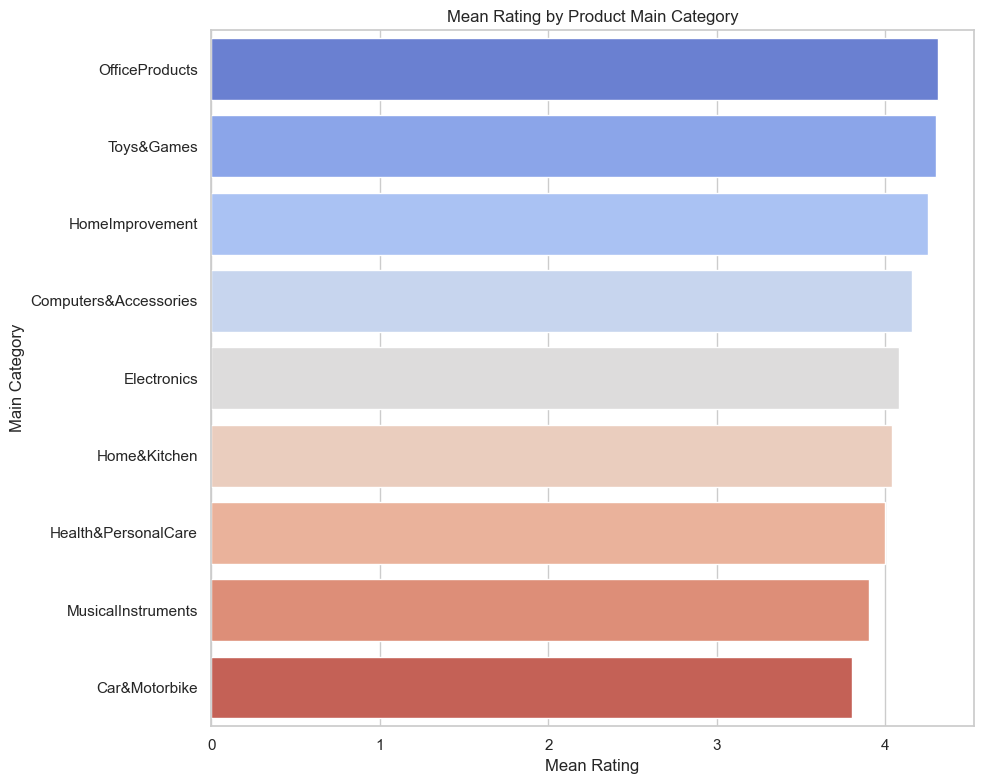

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# First, ensure the 'rating' column is numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')  # Converts non-convertible values to NaN

# Drop any rows that now contain NaN values in 'rating' after conversion
df.dropna(subset=['rating'], inplace=True)

# Extract the main category as before
df['main_category'] = df['category'].str.split('|').str[0]

# Now calculate the mean rating by main category
category_mean_rating = df.groupby('main_category')['rating'].mean().reset_index()

# Sort the categories based on mean rating for better visualization
category_mean_rating_sorted = category_mean_rating.sort_values(by='rating', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='rating', y='main_category', data=category_mean_rating_sorted, palette='coolwarm')
plt.title('Mean Rating by Product Main Category')
plt.xlabel('Mean Rating')
plt.ylabel('Main Category')
plt.tight_layout()
plt.show()


C:\Users\a.ahangi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\a.ahangi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


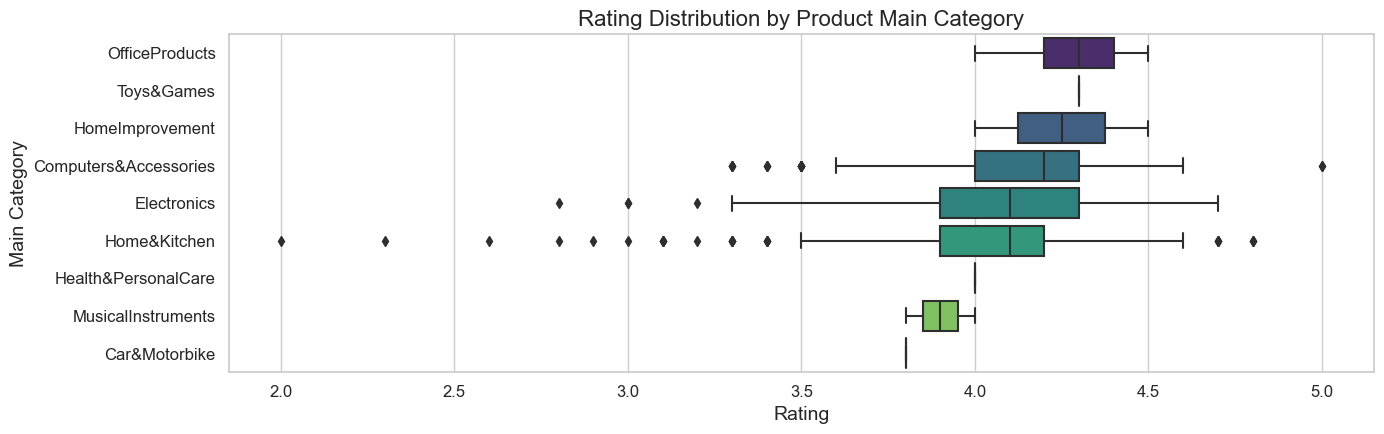

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is already loaded into 'df'
# and it contains a 'category' column with hierarchical data separated by '|'

# Extract the first (main) category as 'main_category'
df['main_category'] = df['category'].str.split('|').str[0]

# Ensure the 'rating' column is numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows with NaN values in 'rating' after conversion
df.dropna(subset=['rating'], inplace=True)

# Calculate the mean rating by main category for ordering
main_category_mean_ratings = df.groupby('main_category')['rating'].mean().reset_index().sort_values(by='rating', ascending=False)

# Plotting
plt.figure(figsize=(14, len(main_category_mean_ratings) / 2))  # Adjust the height based on the number of main categories
sns.boxplot(x='rating', y='main_category', data=df, order=main_category_mean_ratings['main_category'], palette='viridis')
plt.title('Rating Distribution by Product Main Category', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Main Category', fontsize=14)
plt.yticks(fontsize=12)  # Adjust fontsize for y-axis labels to ensure readability
plt.xticks(fontsize=12)  # Adjust fontsize for x-axis labels if necessary
plt.tight_layout()
plt.show()


In [43]:
# Step 2: Extract the main category (if not already done)
df['main_category'] = df['category'].str.split('|').str[0]

# Step 3: Count unique main categories
main_category_count = df['main_category'].nunique()

print(f"Number of unique main categories: {main_category_count}")


Number of unique main categories: 9


C:\Users\a.ahangi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\a.ahangi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


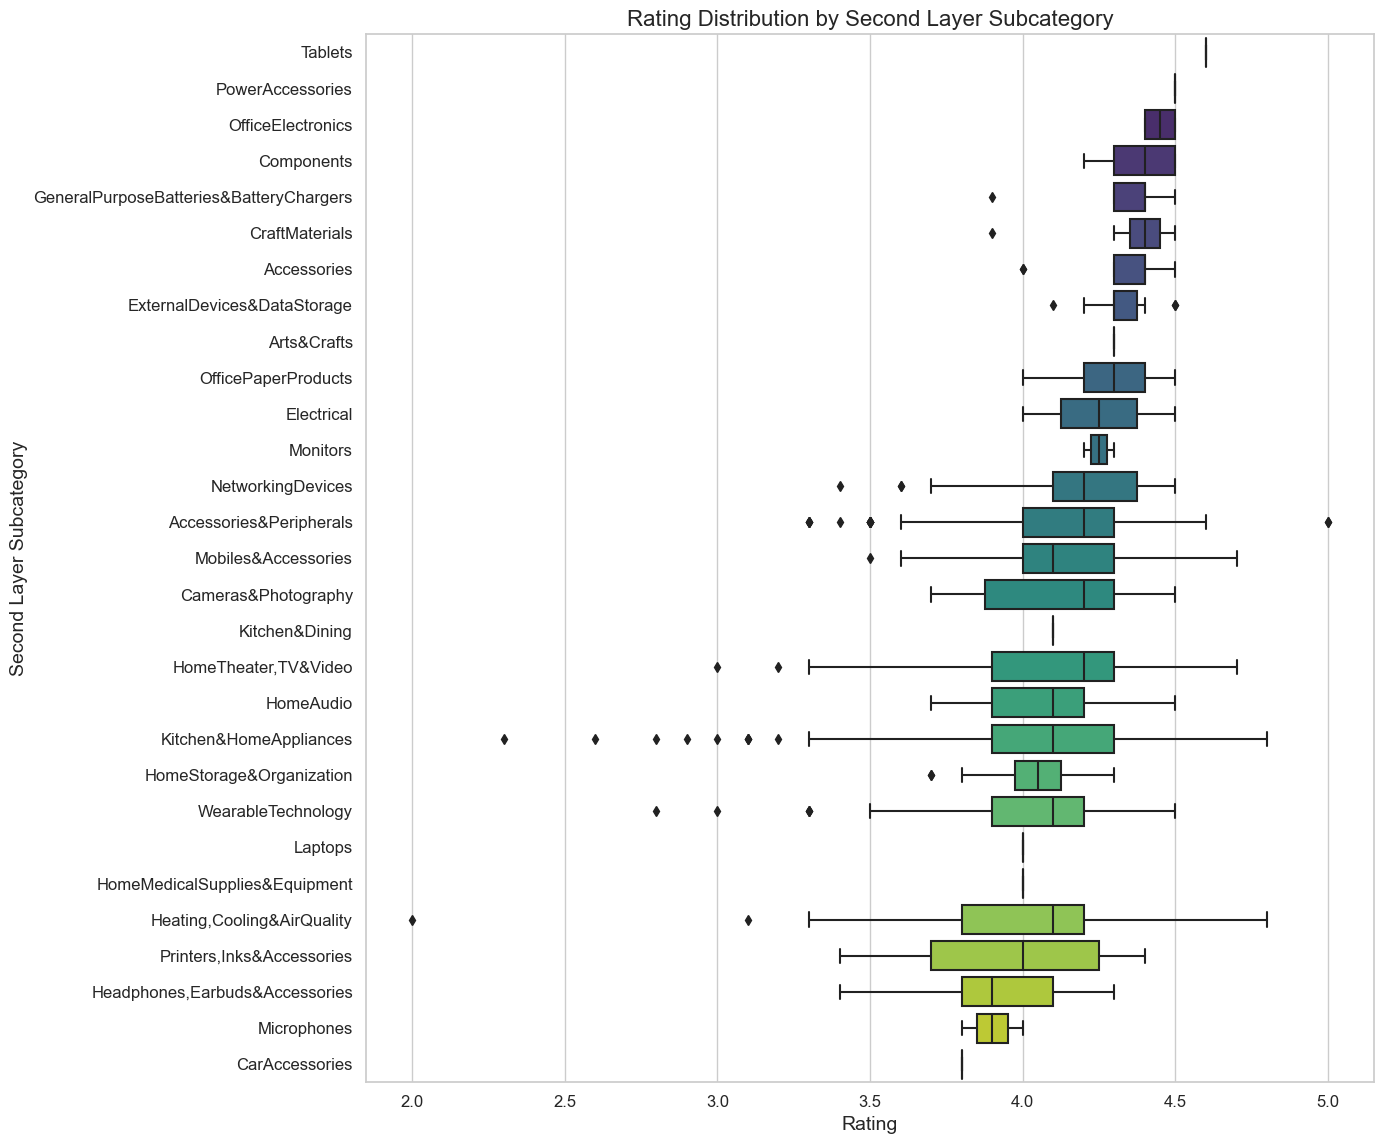

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame 'df' has a 'category' column with hierarchical data separated by '|'

# Extract the second layer category for each product
df['second_layer_category'] = df['category'].str.split('|').apply(lambda x: x[1] if len(x) > 1 else x[0])

# Ensure the 'rating' column is numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows with NaN values in 'rating' after conversion
df.dropna(subset=['rating'], inplace=True)

# Calculate the mean rating by the second layer category for ordering
second_layer_category_mean_ratings = df.groupby('second_layer_category')['rating'].mean().reset_index().sort_values(by='rating', ascending=False)

# Plotting
plt.figure(figsize=(14, max(8, len(second_layer_category_mean_ratings) * 0.4)))  # Adjust the height dynamically based on the number of categories
sns.boxplot(x='rating', y='second_layer_category', data=df, order=second_layer_category_mean_ratings['second_layer_category'], palette='viridis')
plt.title('Rating Distribution by Second Layer Subcategory', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Second Layer Subcategory', fontsize=14)
plt.yticks(fontsize=12)  # Adjust fontsize for y-axis labels to ensure readability
plt.xticks(fontsize=12)  # Adjust fontsize for x-axis labels if necessary
plt.tight_layout()
plt.show()


C:\Users\a.ahangi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\a.ahangi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\a.ahangi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categoric

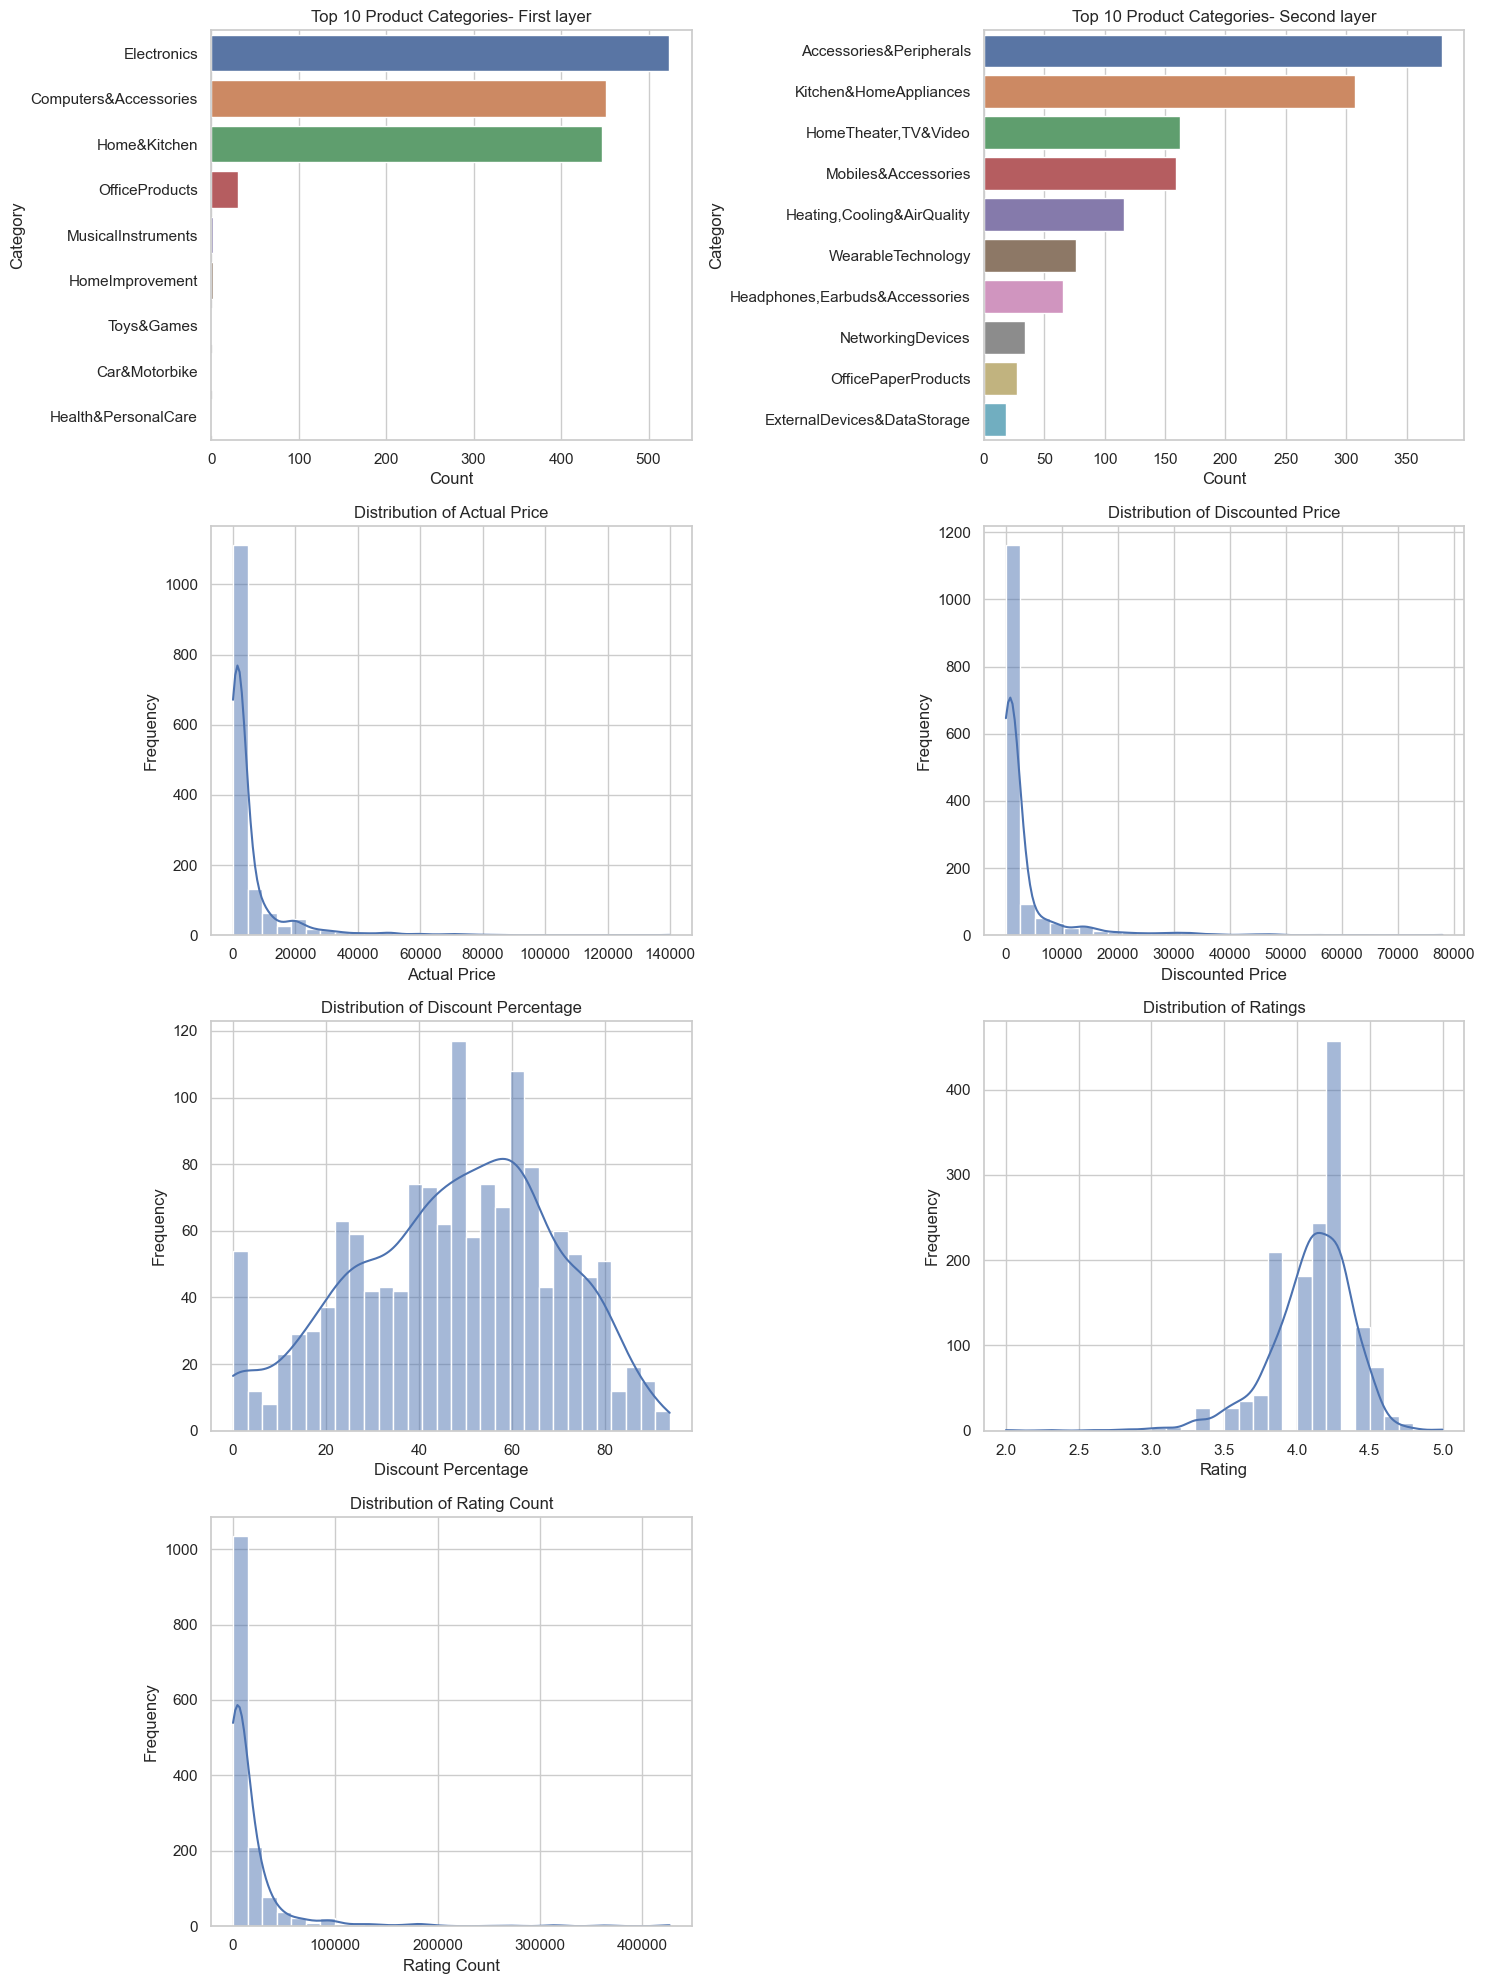

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating visualizations for the specified columns
plt.figure(figsize=(15, 20))

# Since 'category' is a categorical variable with potentially many unique values,
# we will display the top 10 categories for clarity
plt.subplot(4, 2, 1)
top_categories = df['main_category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 Product Categories- First layer')
plt.xlabel('Count')
plt.ylabel('Category')

plt.subplot(4, 2, 2)
top_categories = df['second_layer_category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 Product Categories- Second layer')
plt.xlabel('Count')
plt.ylabel('Category')

# Histogram for 'actual_price'
plt.subplot(4, 2, 3)
sns.histplot(df['actual_price'], bins=30, kde=True)
plt.title('Distribution of Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Frequency')

# Histogram for 'discounted_price'
plt.subplot(4, 2, 4)
sns.histplot(df['discounted_price'], bins=30, kde=True)
plt.title('Distribution of Discounted Price')
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')

# Histogram for 'discount_percentage'
plt.subplot(4, 2, 5)
sns.histplot(df['discount_percentage'], bins=30, kde=True)
plt.title('Distribution of Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')

# Histogram for 'rating'
plt.subplot(4, 2, 6)
sns.histplot(df['rating'], bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Histogram for 'rating_count'
plt.subplot(4, 2, 7)
sns.histplot(df['rating_count'], bins=30, kde=True)
plt.title('Distribution of Rating Count')
plt.xlabel('Rating Count')
plt.ylabel('Frequency')

# Adjusting the layout
plt.tight_layout()
plt.show()

C:\Users\a.ahangi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\a.ahangi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\a.ahangi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categoric

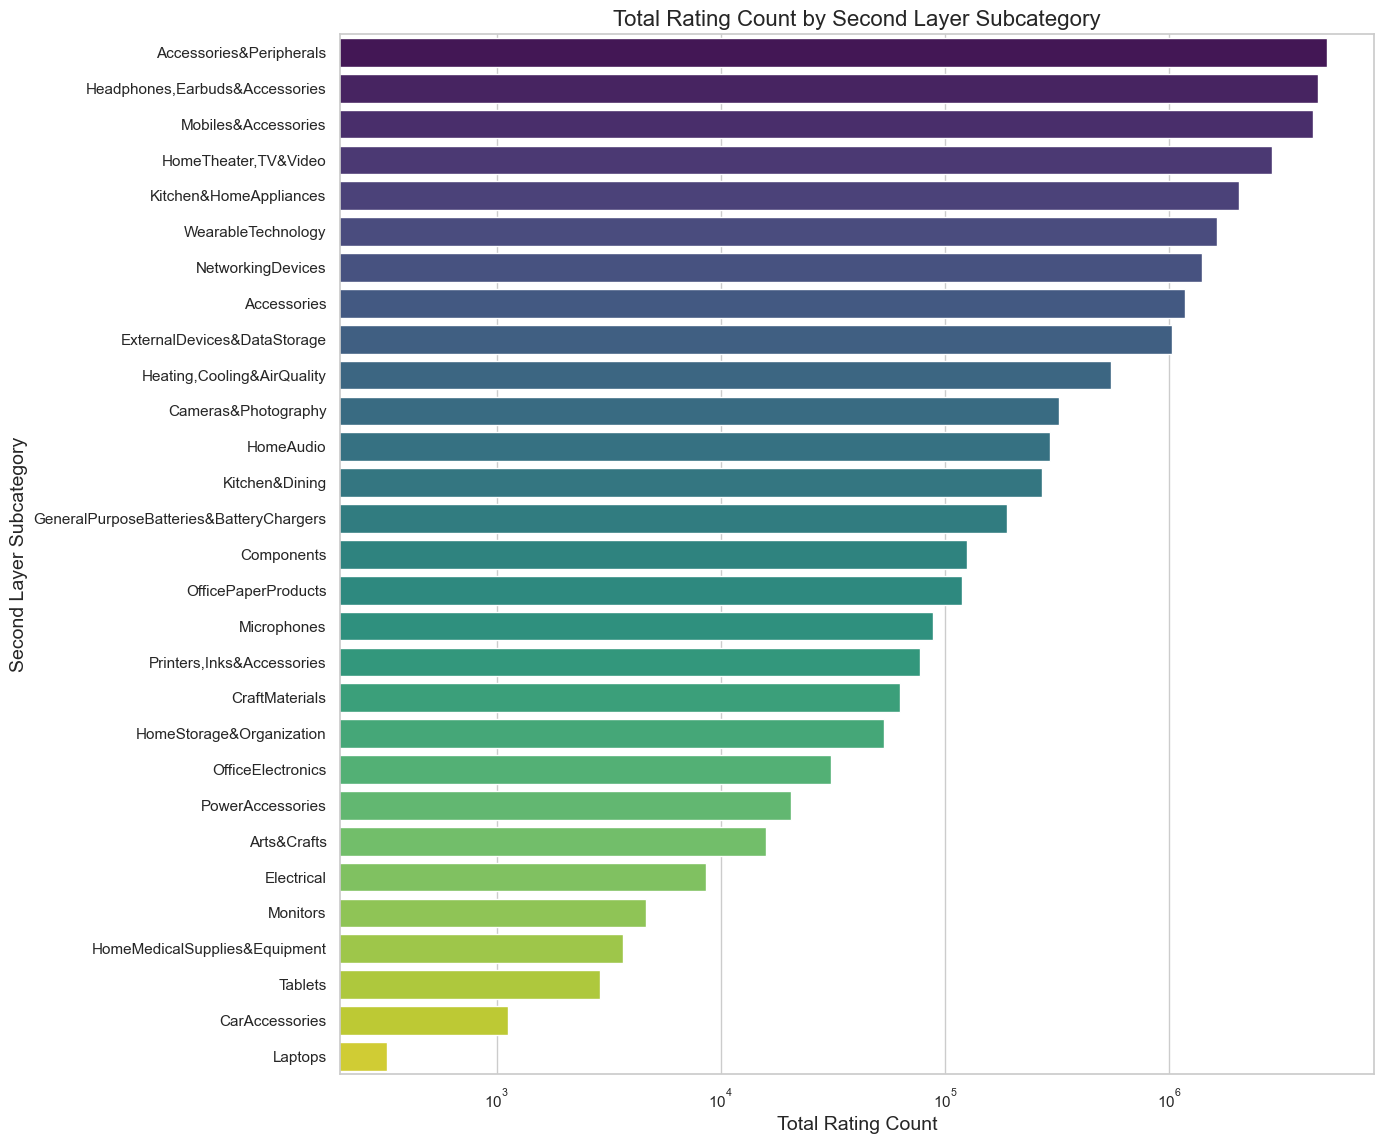

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame 'df' has a 'category' and 'rating_count' columns
# Ensure 'rating_count' is in the correct numeric format
df['rating_count'] = pd.to_numeric(df['rating_count'].str.replace(',', ''), errors='coerce')

# Extract the second layer category for each product
df['second_layer_category'] = df['category'].str.split('|').apply(lambda x: x[1] if len(x) > 1 else x[0])

# Calculate the total rating count by the second layer category
second_layer_category_rating_counts = df.groupby('second_layer_category')['rating_count'].sum().reset_index().sort_values(by='rating_count', ascending=False)

# Plotting
plt.figure(figsize=(14, max(8, len(second_layer_category_rating_counts) * 0.4)))  # Adjust the height dynamically
sns.barplot(x='rating_count', y='second_layer_category', data=second_layer_category_rating_counts, palette='viridis')
plt.title('Total Rating Count by Second Layer Subcategory', fontsize=16)
plt.xlabel('Total Rating Count', fontsize=14)
plt.ylabel('Second Layer Subcategory', fontsize=14)
plt.xscale('log')  # Using a logarithmic scale for better visualization if there are wide variances
plt.tight_layout()
plt.show()


C:\Users\a.ahangi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\a.ahangi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\a.ahangi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categoric

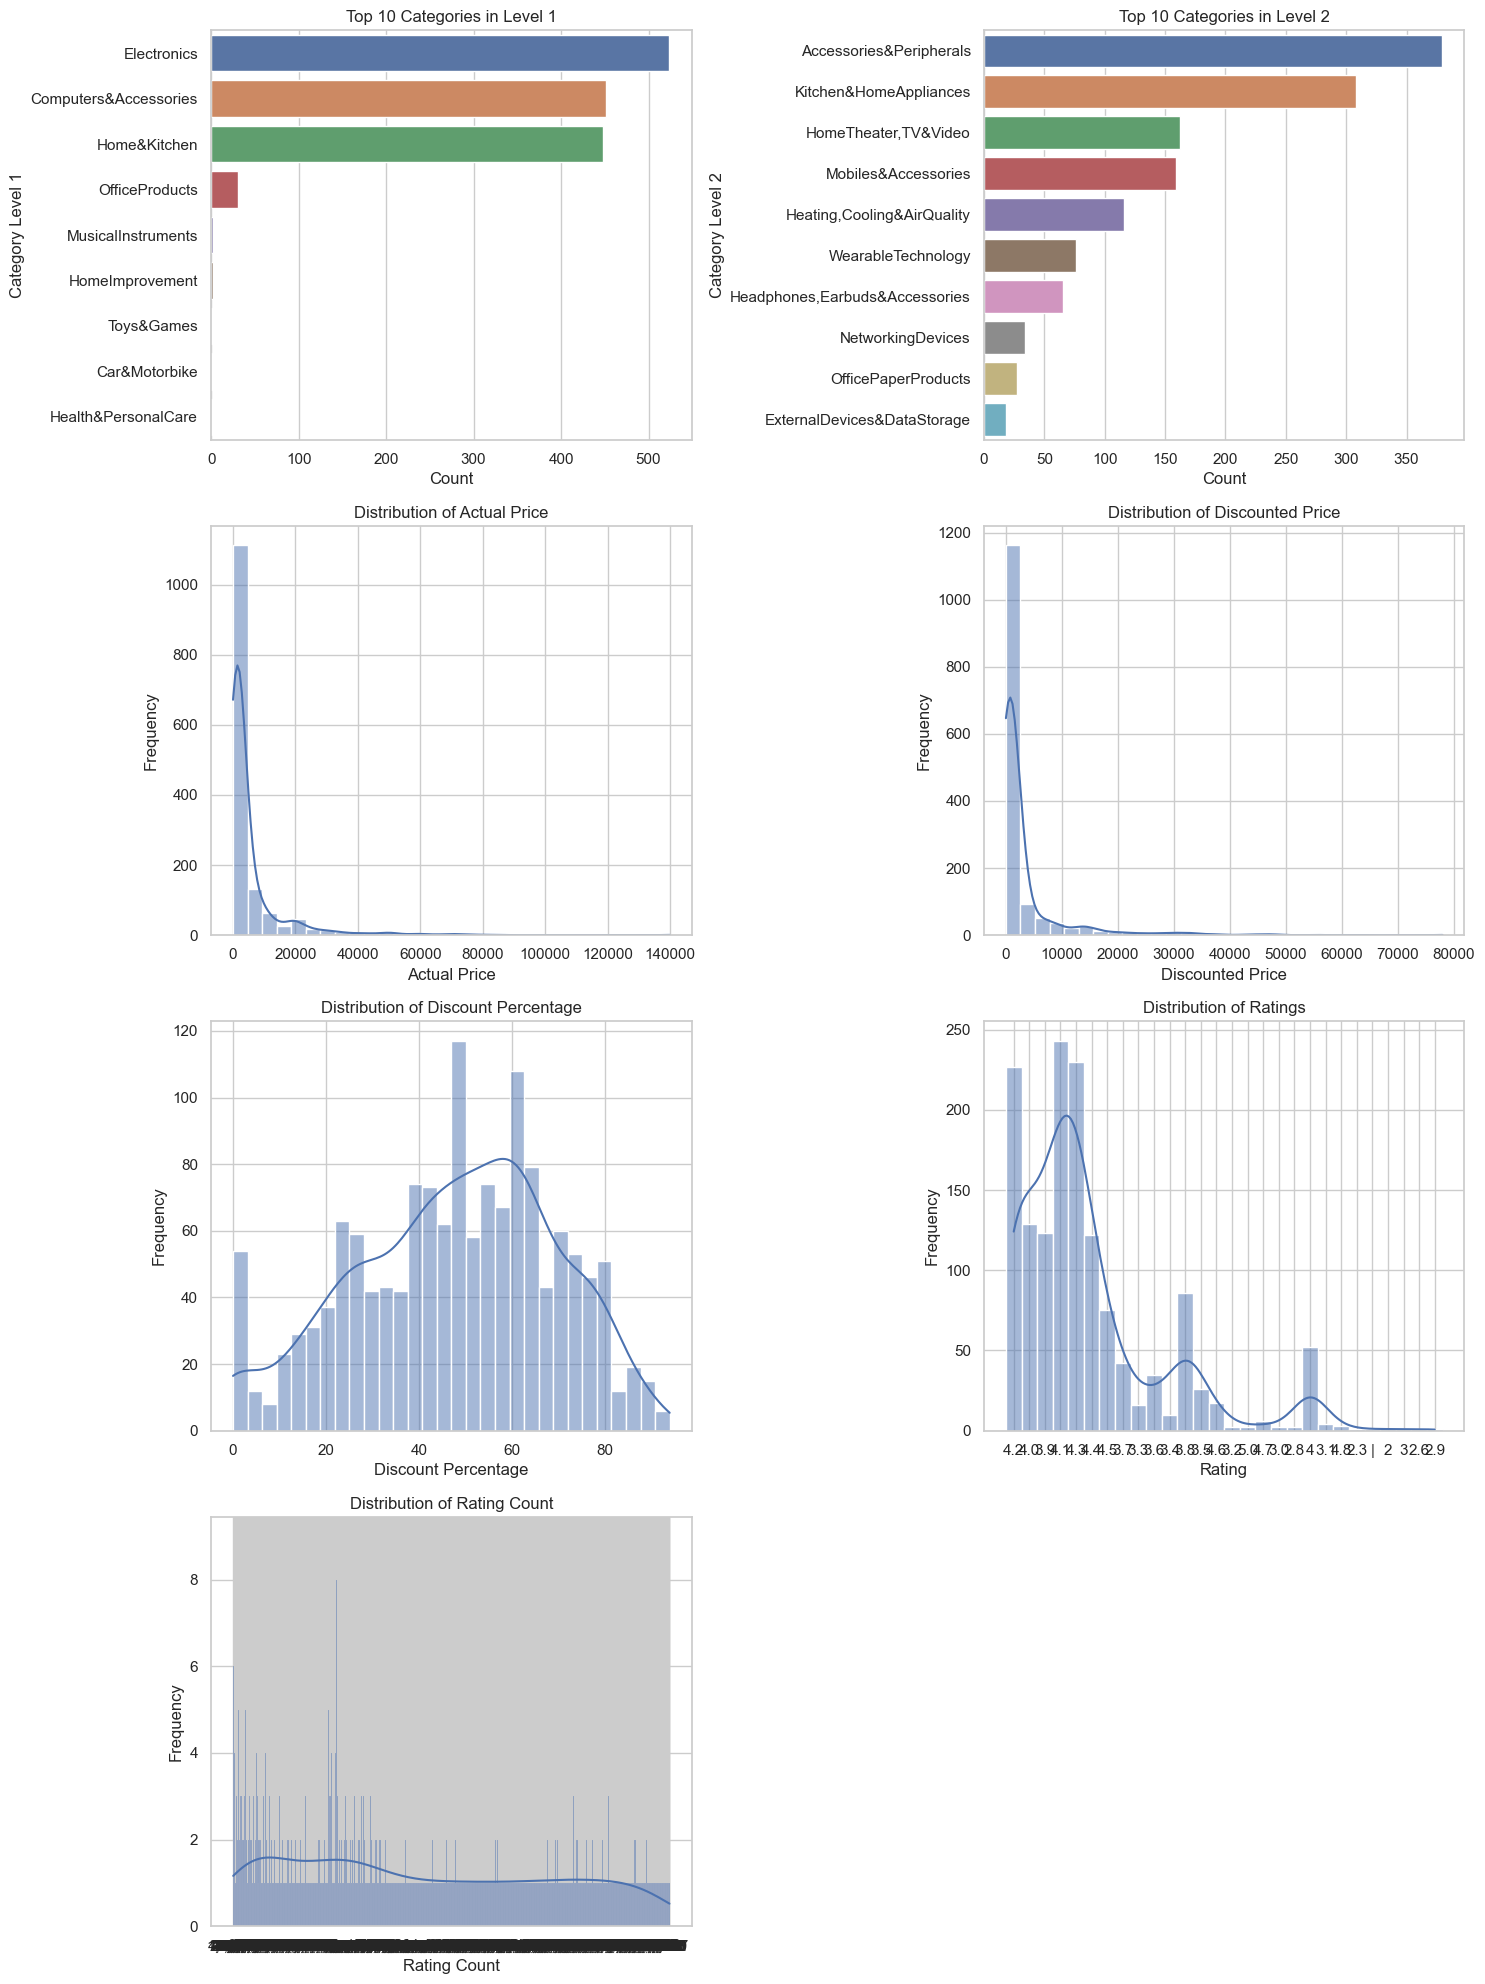

In [ ]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating visualizations for the specified columns and new category levels
plt.figure(figsize=(15, 20))

# Bar plot for 'category_level_1'
plt.subplot(4, 2, 1)
top_categories_level_1 = df['category_level_1'].value_counts().head(10)
sns.barplot(x=top_categories_level_1.values, y=top_categories_level_1.index)
plt.title('Top 10 Categories in Level 1')
plt.xlabel('Count')
plt.ylabel('Category Level 1')

# Bar plot for 'category_level_2'
plt.subplot(4, 2, 2)
top_categories_level_2 = df['category_level_2'].value_counts().head(10)
sns.barplot(x=top_categories_level_2.values, y=top_categories_level_2.index)
plt.title('Top 10 Categories in Level 2')
plt.xlabel('Count')
plt.ylabel('Category Level 2')

# Histogram for 'actual_price'
plt.subplot(4, 2, 3)
sns.histplot(df['actual_price'], bins=30, kde=True)
plt.title('Distribution of Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Frequency')

# Histogram for 'discounted_price'
plt.subplot(4, 2, 4)
sns.histplot(df['discounted_price'], bins=30, kde=True)
plt.title('Distribution of Discounted Price')
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')

# Histogram for 'discount_percentage'
plt.subplot(4, 2, 5)
sns.histplot(df['discount_percentage'], bins=30, kde=True)
plt.title('Distribution of Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')

# Histogram for 'rating'
plt.subplot(4, 2, 6)
sns.histplot(df['rating'], bins=300, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Histogram for 'rating_count'
plt.subplot(4, 2, 7)
sns.histplot(df['rating_count'], bins=300, kde=True)
plt.title('Distribution of Rating Count')
plt.xlabel('Rating Count')
plt.ylabel('Frequency')

# Adjusting the layout
plt.tight_layout()
plt.show()

C:\Users\a.ahangi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\a.ahangi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\a.ahangi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype,

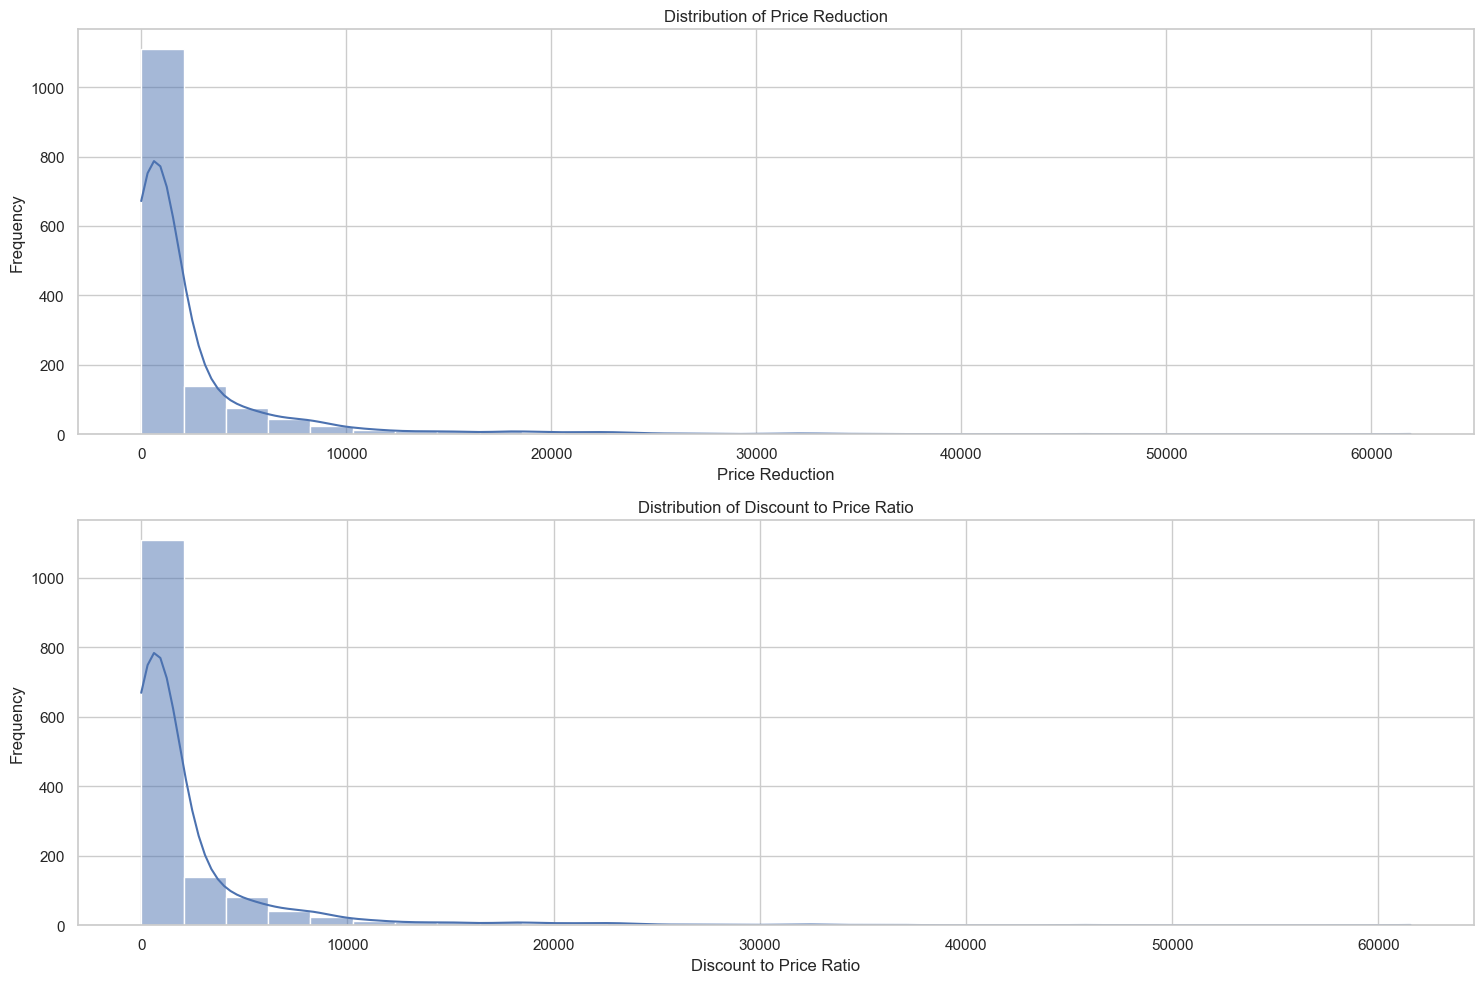

In [ ]:
# Creating visualizations for 'price_reduction' and 'discount_to_price_ratio'
plt.figure(figsize=(15, 10))

# Histogram for 'price_reduction'
plt.subplot(2, 1, 1)
sns.histplot(df['price_reduction'], bins=30, kde=True)
plt.title('Distribution of Price Reduction')
plt.xlabel('Price Reduction')
plt.ylabel('Frequency')

# Histogram for 'discount_to_price_ratio'
plt.subplot(2, 1, 2)
sns.histplot(df['discount_to_price_ratio'], bins=30, kde=True)
plt.title('Distribution of Discount to Price Ratio')
plt.xlabel('Discount to Price Ratio')
plt.ylabel('Frequency')

# Adjusting the layout
plt.tight_layout()
plt.show()


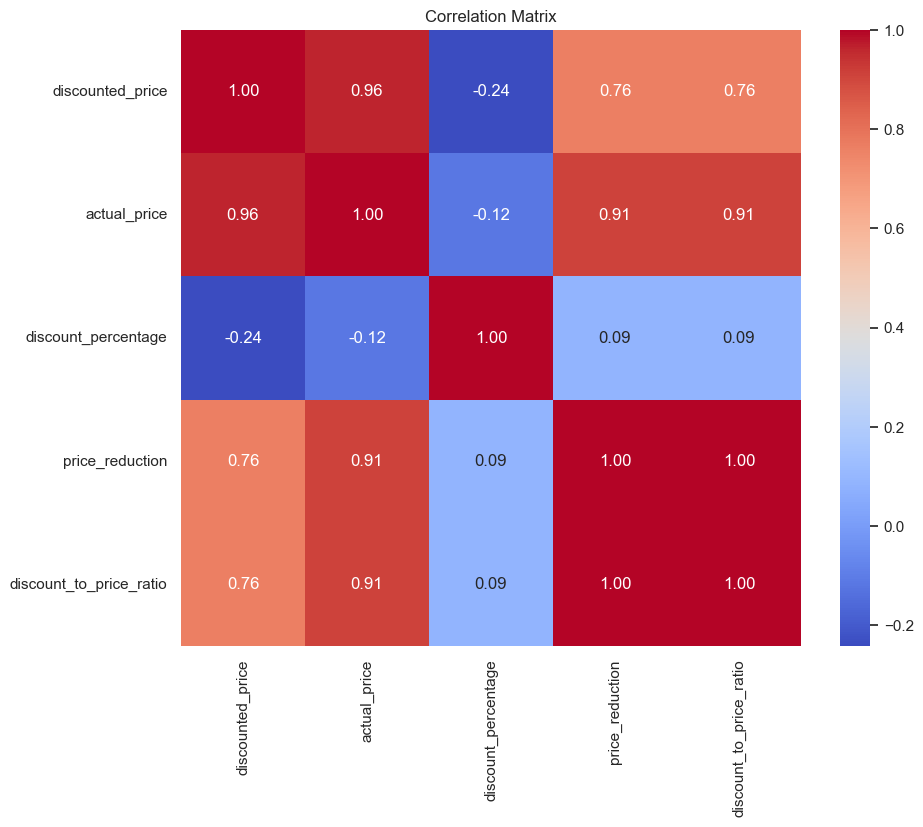

In [ ]:
# Assuming you have already loaded the dataset into a DataFrame named 'data'
import numpy as np
# Selecting only numeric columns for correlation analysis
# Exclude non-numeric columns like 'category' or any other categorical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Calculating the correlation matrix for numeric columns
correlation_matrix = df[numeric_columns].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



# Load the dataset
df = pd.read_csv('amazon.csv')

# Handling missing values by dropping them
df.dropna(inplace=True)

# Converting string-formatted numeric columns to actual numeric types
columns_to_convert = ['rating_count', 'actual_price', 'discounted_price', 'discount_percentage', 'rating']
for col in columns_to_convert:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '').str.replace('â‚¹', '').str.replace('%', '').str.replace('|', '')
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Dropping any rows that now contain NaN values after conversion (if any)
df.dropna(inplace=True)

# Adding calculated features 'price_reduction' and 'discount_to_price_ratio'
df['price_reduction'] = df['actual_price'] - df['discounted_price']
df['discount_to_price_ratio'] = df['discount_percentage'] / 100 * df['actual_price']

# Selecting relevant numeric features
features_to_use = ['actual_price', 'discounted_price', 'discount_percentage', 'rating_count', 'price_reduction', 'discount_to_price_ratio']

# Ensuring the selected features are in the DataFrame and also including the target 'rating'
relevant_columns = features_to_use + ['rating']
df = df[relevant_columns]



In [ ]:
# Splitting the dataset into features (X) and target variable (y)
X = df[features_to_use]
y = df['rating']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the ratings
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.08180835153248954


In [ ]:
# Extracting the coefficients
feature_importance = pd.DataFrame(model.coef_, index=features_to_use, columns=['Coefficient'])

# Sorting the features by the absolute value of their coefficient
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
sorted_feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

print(sorted_feature_importance)


                          Coefficient  Absolute Coefficient
discount_percentage     -2.437648e-03          2.437648e-03
discount_to_price_ratio -1.749038e-04          1.749038e-04
price_reduction          1.226320e-04          1.226320e-04
discounted_price        -6.199519e-05          6.199519e-05
actual_price             6.063685e-05          6.063685e-05
rating_count             7.317334e-07          7.317334e-07


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=0)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_pred = rf_model.predict(X_test)

# Calculate the Mean Squared Error
rf_mse = mean_squared_error(y_test, rf_pred)

print(rf_mse)

0.0666989520547945


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the Gradient Boosting model
gbm_model = GradientBoostingRegressor(random_state=0)

# Fit the model on the training data
gbm_model.fit(X_train, y_train)

# Make predictions on the test data
gbm_pred = gbm_model.predict(X_test)

# Calculate the Mean Squared Error
gbm_mse = mean_squared_error(y_test, gbm_pred)

print(gbm_mse)


0.07401109916096373


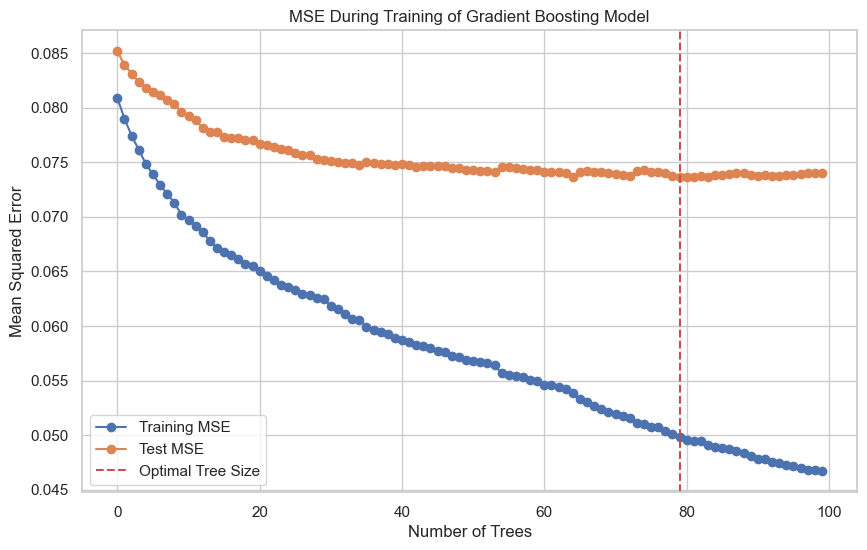

Minimum Test MSE at 80 trees


In [57]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize the Gradient Boosting Regressor
gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=0)

# Fit the model
gbm_model.fit(X_train, y_train)

# Evaluate MSE during training
train_errors = [mean_squared_error(y_train, y_pred) for y_pred in gbm_model.staged_predict(X_train)]
test_errors = [mean_squared_error(y_test, y_pred) for y_pred in gbm_model.staged_predict(X_test)]

# Find the number of trees that gives the minimum test error
min_error_at = np.argmin(test_errors)

# Plotting the changes in MSE
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Training MSE', marker='o')
plt.plot(test_errors, label='Test MSE', marker='o')
plt.axvline(min_error_at, color='r', linestyle='--', label='Optimal Tree Size')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.title('MSE During Training of Gradient Boosting Model')
plt.legend()
plt.show()

print(f"Minimum Test MSE at {min_error_at+1} trees")


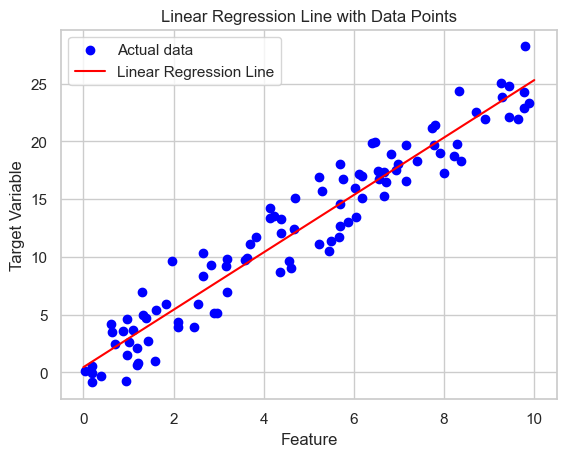

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
# Assuming X and y are your features and target variables respectively and are appropriately shaped
# For example purposes, let's create some sample data
np.random.seed(0)  # For reproducibility
X = np.random.rand(100, 1) * 10  # Features
y = 2.5 * X + np.random.randn(100, 1) * 2  # Target variable with some noise

# Fitting the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Making predictions
X_new = np.linspace(0, 10, 100).reshape(100, 1)  # Generating new data for making predictions
y_pred = model.predict(X_new)

# Plotting the data points
plt.scatter(X, y, color='blue', label='Actual data')

# Plotting the Linear Regression line
plt.plot(X_new, y_pred, color='red', label='Linear Regression Line')

plt.xlabel('Feature')
plt.ylabel('Target Variable')
plt.title('Linear Regression Line with Data Points')
plt.legend()
plt.show()



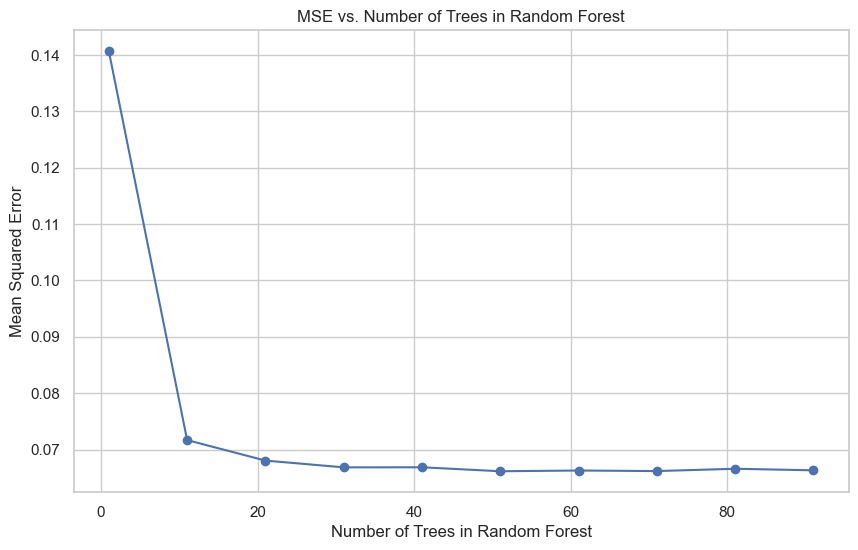

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined

# List to store MSE for each model
mse_values = []

# Range of 'n_estimators' to evaluate
n_estimators_range = range(1, 101, 10)  # For example, 1 to 100 in steps of 10

for n_trees in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n_trees, random_state=0)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mse_values.append(mse)

# Plotting the MSE values over the number of trees
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, mse_values, marker='o')
plt.xlabel('Number of Trees in Random Forest')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Number of Trees in Random Forest')
plt.show()


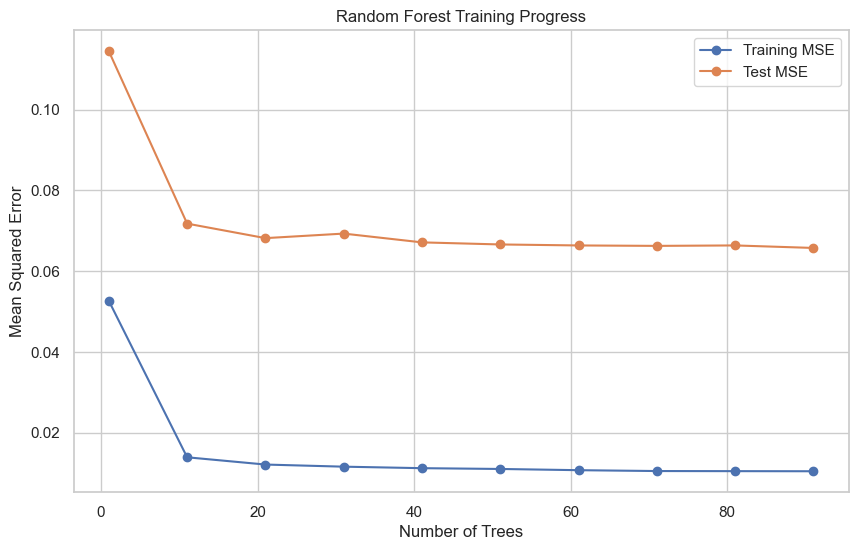

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

n_trees_list = range(1, 101, 10)  # Number of trees from 1 to 100 in steps of 10
train_mse = []
test_mse = []

for n_trees in n_trees_list:
    model = RandomForestRegressor(n_estimators=n_trees, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    
    # Predict and calculate MSE for both train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

# Plotting the training and testing MSE as a function of the number of trees
plt.figure(figsize=(10, 6))
plt.plot(n_trees_list, train_mse, label='Training MSE', marker='o')
plt.plot(n_trees_list, test_mse, label='Test MSE', marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.title('Random Forest Training Progress')
plt.legend()
plt.show()
